# Tache 8 : Jérémy Roger 

In [43]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [44]:
# HfNiSn
mp_key = "fnNhNeZr2KXTJ64m73UhQ93prbDkSyqH"
mp_id = "mp-924128"

In [45]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    ph_band = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Bande de phonons

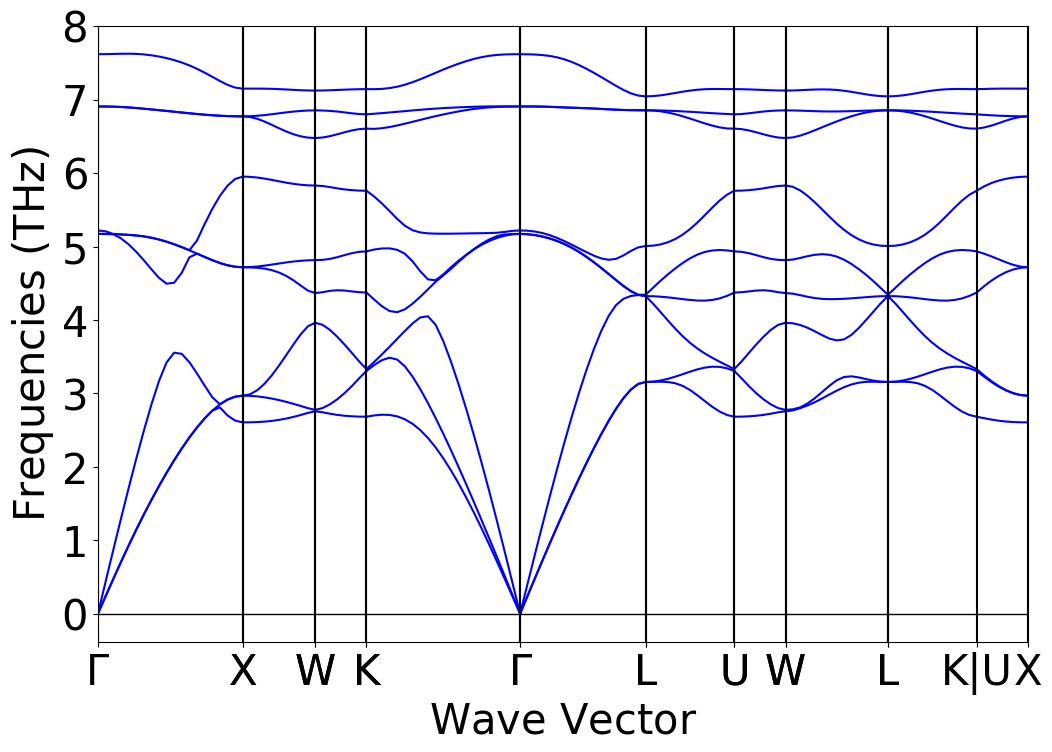

In [46]:
bsplot = PhononBSPlotter(ph_band)
bsplot.show()

## Zone de Brillouin

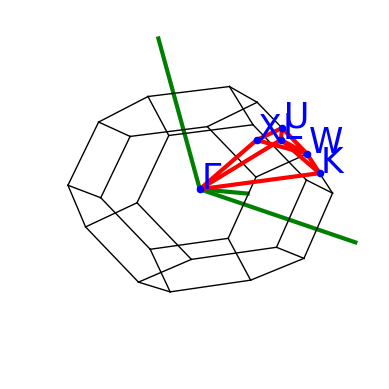

In [47]:
bsplot.plot_brillouin()

## Vitesse du son

Pour la calculer on utilise :

$$ v = \left|\frac{d\omega}{dq}\right| $$

Où : $ v $ est la vitesse de propagation du son, $ \omega$ $ (= 2\pi f) $ est la fréquence angulaire, $ q $ est le vecteur d'onde.
 

### Bandes accoustiques 
Les branches acoustiques sont celles qui ont $\omega = 0$ au centre de la zone de Brillouin (point 
$\Gamma$). On a donc des branches acoustiques dans les directions $\Gamma - X$, $\Gamma - K$ et $\Gamma - L$ 

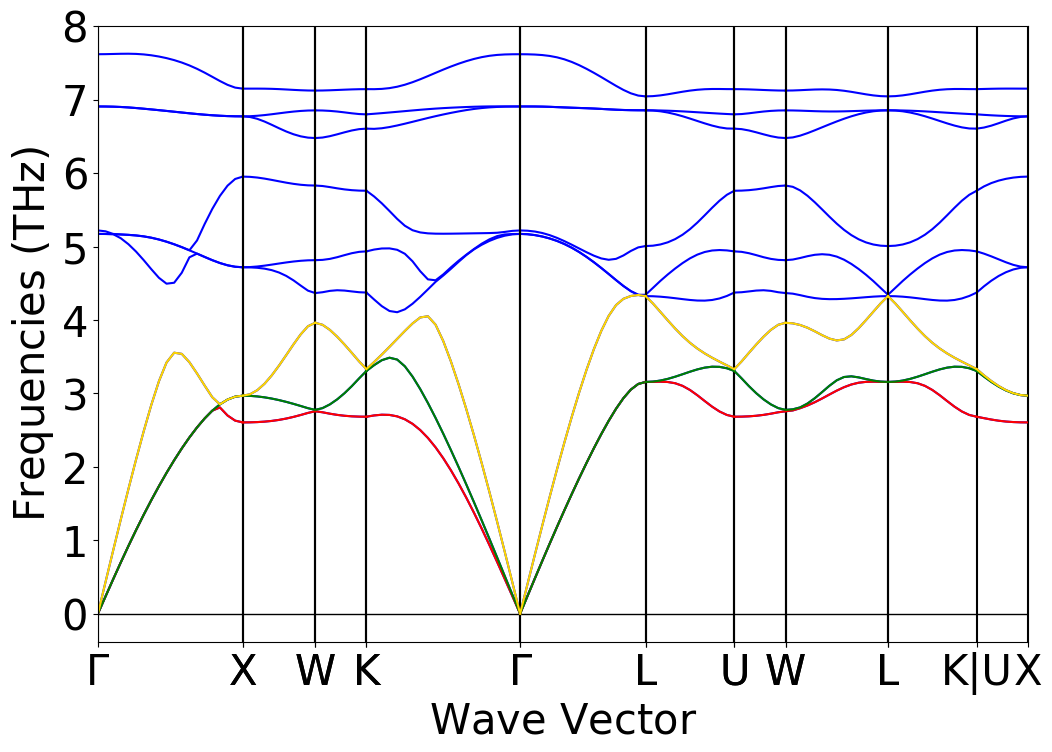

In [48]:
bsplot.get_plot()
data = bsplot.bs_plot_data() 
distance = data.get("distances")
frequence = data.get("frequency")
for i in range(len(dist)):
    plt.plot(distance[i], frequence[i][0], 'red')
    plt.plot(distance[i], frequence[i][1], 'green')
    plt.plot(distance[i], frequence[i][2], 'gold')

In [49]:
angstrom = 10**(-10)

## Direction $\Gamma - X$

In [50]:
x0 = distance[0][0]/angstrom
x1 = distance[0][1]/angstrom

y0 = 2*np.pi*frequence[0][0][0]*10**(12)  #THz en Hz
y1 = 2*np.pi*frequence[0][0][1]*10**(12)

vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son dans la direction Γ-X (branche rouge) vaut", vs, "m/s.\n")

La vitesse du son dans la direction Γ-X (branche rouge) vaut 2707.619387877144 m/s.



## Direction $\Gamma - K$

In [51]:
x0 = distance[3][-1]/angstrom
x1 = distance[3][-2]/angstrom

y0 = 2*np.pi*frequence[3][1][-1]*10**(12)  
y1 = 2*np.pi*frequence[3][1][-2]*10**(12)

vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son dans la direction Γ-K (branche verte) vaut", vs, "m/s.\n")

La vitesse du son dans la direction Γ-K (branche verte) vaut 2935.844749285472 m/s.



## Diection $\Gamma - L$

In [52]:
x0 = distance[4][0]/angstrom
x1 = distance[4][1]/angstrom

y0 = 2*np.pi*frequence[4][2][0]*10**(12)  
y1 = 2*np.pi*frequence[4][2][1]*10**(12)

vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son dans la direction Γ-L (branche jaune) vaut", vs, "m/s.\n")

La vitesse du son dans la direction Γ-L (branche jaune) vaut 4790.963858061092 m/s.

